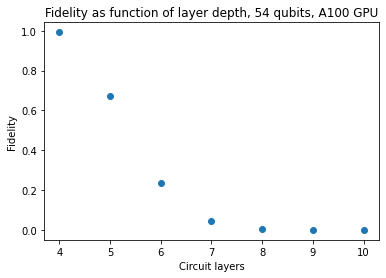

In [1]:
import matplotlib.pyplot as plt

x = [4, 5, 6, 7, 8, 9, 10]
y = [0.99288521712377, 0.671383003028583, 0.234468643479717, 0.0449470199483396, 0.00667232581207936, 0.000529391498451999, 2.43110180108726E-05]

plt.scatter(x, y)
plt.title("Fidelity as function of layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel("Fidelity")
plt.show()

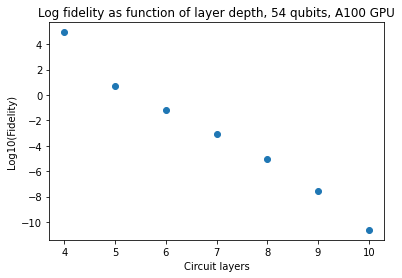

In [2]:
import numpy as np

yLog = np.log(y/(np.asarray([1-a for a in y])))

plt.scatter(x, yLog)
plt.title("Log fidelity as function of layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel("Log10(Fidelity)")
plt.show()

<Figure size 1008x1008 with 0 Axes>

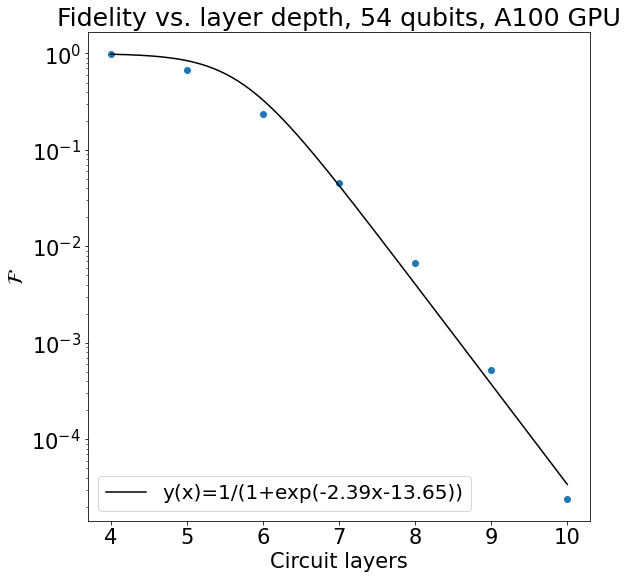

In [3]:
fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=20)
plt.rcParams.update({'font.size': 21})

fig, ax = plt.subplots(figsize = (9, 9))
plt.title("Fidelity vs. layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel(r"$\mathcal{F}$")
plt.yscale("log")

ax.scatter(x, y)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, yLog)

t = np.asarray([4 + (a / 1024) for a in range(0, (10 - 4) * 1024)])

line = 1/(1 + np.exp(-(slope * np.array(t)+intercept)))
ax.plot(t, line, 'k', label='y(x)=1/(1+exp({:.2f}x-{:.2f}))'.format(slope,intercept))
plt.legend()

fig.savefig('noisy_a100.png', dpi=100)

In [4]:
sse = 0
sst = 0
for i in range(len(yLog)):
    o = yLog[i]
    sst += o * o
    res = (o - (intercept + slope * (i + 7)))
    sse += res * res

print("slope: ", slope)
print("intercept: ", intercept)
# Dependent and independent are intentionally anti-correlated by convention:
print("R-squared: ", -r_value)
print("p-value: ", p_value)

slope:  -2.3937226375881697
intercept:  13.6478377554325
R-squared:  0.9926408706046453
p-value:  8.888032337506537e-06
